In [37]:
import pandas as pd
import numpy as np
import csv
%matplotlib inline

In [2]:
import os 

In [3]:
os.chdir('D:/Netology/2280.log')

In [5]:
# import csv

# with open('2270.log') as file:
#     lines = file.readlines()

#     with open('yourcsv1.csv', 'w+', encoding='utf-8') as csvfile:
#         w = csv.writer(csvfile)
#         w.writerows(lines)

In [8]:
txt_file = r"2280.log"
csv_file = r"sales.csv"
in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')
out_csv = csv.writer(open(csv_file, 'w'))
out_csv.writerows(in_txt)

In [9]:
?pd.read_csv

In [9]:
df = pd.read_csv('sales.csv', sep=',', names = ['uesr_id', 'item_id', 'quantity'], engine='python', encoding='utf-8')

In [23]:
df.rename(index=str, columns={"uesr_id": "user_id"}, inplace=True)

In [26]:
df.head()

,user_id,item_id,quantity
0,16594673,12134478,1
1,16594673,18938298,1
2,16594673,14040982,1
3,16594673,12142406,1
4,12476283,15336285,1


In [27]:
df.tail()

,user_id,item_id,quantity
9535374,11099334,15845883,1
9535375,13141283,16247986,6
9535376,18093005,16239674,2
9535377,19705493,17840862,1
9535378,13912352,13933505,1


In [28]:
df.describe()

,user_id,item_id,quantity
count,9.535379e+06,9.535379e+06,9.535379e+06
mean,1.500000e+07,1.500221e+07,2.359386e+00
std,2.857213e+06,2.884514e+06,7.005343e+00
min,1.000000e+07,1.002087e+07,1.000000e+00
25%,1.257007e+07,1.254104e+07,1.000000e+00
50%,1.491173e+07,1.503408e+07,1.000000e+00
75%,1.753426e+07,1.753385e+07,1.000000e+00
max,1.999994e+07,1.994900e+07,2.576000e+03


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535379 entries, 0 to 9535378
Data columns (total 3 columns):
user_id     int64
item_id     int64
quantity    int64
dtypes: int64(3)
memory usage: 291.0+ MB


In [31]:
pivotusers = pd.pivot_table(df, index = 'user_id', values = 'quantity', aggfunc=np.sum)

In [33]:
pivotusers.describe()

,quantity
count,530406.000000
mean,42.415885
std,723.804093
min,1.000000
25%,2.000000
50%,5.000000
75%,18.000000
max,349284.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015CF2D9EA58>]], dtype=object)

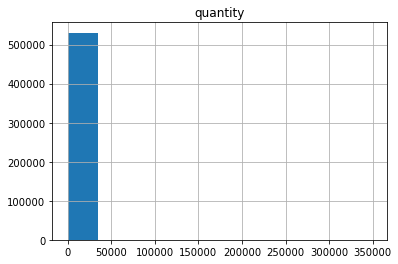

In [44]:
pivotusers.hist(column=['quantity'])

In [46]:
usersnooutliers = pivotusers[np.abs(pivotusers.quantity-pivotusers.quantity.mean())<=(3*pivotusers.quantity.std())] 

In [47]:
usersnooutliers.describe()

,quantity
count,529708.000000
mean,34.478148
std,120.254936
min,1.000000
25%,2.000000
50%,5.000000
75%,18.000000
max,2211.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015CF5E7DE48>]], dtype=object)

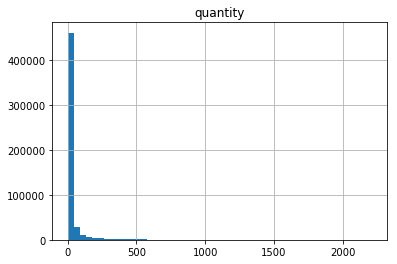

In [72]:
usersnooutliers.hist(bins = 50)

In [58]:
usersnooutliers.index

Int64Index([10000002, 10000033, 10000073, 10000082, 10000103, 10000105,
            10000124, 10000144, 10000154, 10000214,
            ...
            19999714, 19999744, 19999834, 19999864, 19999893, 19999894,
            19999922, 19999924, 19999933, 19999944],
           dtype='int64', name='user_id', length=529708)

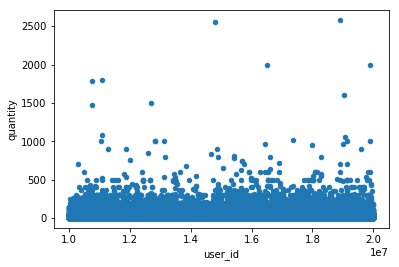

In [60]:
df.plot(kind='scatter', x='user_id', y = 'quantity')

In [67]:
usersnooutliers2 = pivotusers[pivotusers.quantity<=25] 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015CF3812908>]], dtype=object)

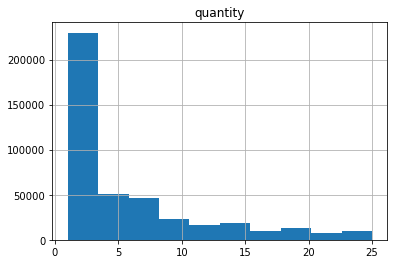

In [68]:
usersnooutliers2.hist()